<a href="https://colab.research.google.com/github/GammyKing/Demo/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 第一部分：数据集模块

In [1]:
# 导入所需数据包
!pip3 install tensorflow-gpu==2.0.0
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.0.0


In [2]:
# 查看TF自带的数据集
print(dir(tf.keras.datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'boston_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [3]:
# 选取数据集
mnist = tf.keras.datasets.mnist
#数据集加载，数据加载后放在~/.keras\datasets,例如：C：\Users\dennis\.keras\datasets\mnist.npz,大约11M
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(type(x_train)) # 查看x_train的类型(numpy)

x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), 'constant', constant_values=0)
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), 'constant', constant_values=0)
print(x_train.shape, x_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.ndarray'>
(60000, 32, 32) (10000, 32, 32)


The label is  8


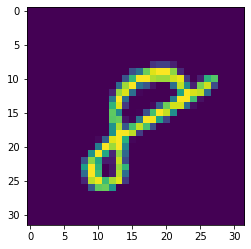

In [4]:
# 查看数据集（选取一个查看）
import matplotlib.pyplot as plt
image_index = 59999 # 随便选取一个值，范围[0,59999)
print("The label is ", y_train[image_index]) # 查看标签值
# plt.imshow(x_train[image_index], cmap='Greys')
plt.imshow(x_train[image_index])
plt.show()

In [5]:
# 数据集格式变换
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1) # TensorFlow对输入数据集的格式为[n, h, w, c],即number, height, width, channel
# 可换成 x_train = np.expand_dims(x_train, axis=-1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
print(x_train.shape, x_test.shape)

# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

(60000, 32, 32, 1) (10000, 32, 32, 1)


### 第二部分：模型建立

In [0]:
# 定义模型
# 模型的构建：tf.keras.Model 和 tf.keras.layers
# 模型的损失函数： tf.keras.losses
# 模型的优化器： tf.keras.optimizer
# 模型的评估： tf.keras.metrics
class LeNet(tf.keras.Model):
  def __init__(self):
    super().__init__()
    # 此处添加初始化代码（包括call方法中会用到的层），例如
    self.conv_layer_1 = tf.keras.layers.Conv2D(
        filters=6,
        kernel_size=(5,5),
        padding='valid',
        activation=tf.nn.relu)
    self.pool_layer_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same')

    self.conv_layers_2 = tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5,5),
        padding='valid',
        activation=tf.nn.relu)
    self.pool_layer_2 = tf.keras.layers.MaxPooling2D(padding='same')

    self.flatten = tf.keras.layers.Flatten()

    self.fc_layer_1 = tf.keras.layers.Dense(
        units=120,
        activation=tf.nn.relu)
    self.fc_layer_2 = tf.keras.layers.Dense(
        units=84,
        activation=tf.nn.relu)
    self.output_layer = tf.keras.layers.Dense(
        units=10,
        activation=tf.nn.softmax)
    
  def call(self, inputs): # [batch_size,28, 28, 1]
    x = self.conv_layer_1(inputs)
    x = self.pool_layer_1(x)
    x = self.conv_layer_2(x)
    x = self.pool_layer_2(x)
    x = self.flatten(x)
    x = self.fc_layer_1(x)
    x = self.fc_layer_2(x)
    output = self.output_layer(x)

    return output
  # 还可以添加自定义的方法

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), padding='valid', activation=tf.nn.relu, input_shape=(32,32,1)),
  tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
  tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),padding=('valid'), activation=tf.nn.relu),
  tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=120, activation=tf.nn.relu),
  tf.keras.layers.Dense(units=84, activation=tf.nn.relu),
  tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])
# model = LeNet()  此处注释掉就是选择了其中一种模型

### 第二部分：模型训练

In [8]:
import numpy as np

# 超参数设置
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# 优化器
adam_optimizer = tf.keras.optimizers.Adam(learning_rate)

model.compile(optimizer=adam_optimizer,
       loss=tf.keras.losses.sparse_categorical_crossentropy,
       metrics=['accuracy'])

import datetime
start_time = datetime.datetime.now()

model.fit(x=x_train,
     y=y_train,
     batch_size=batch_size,
     epochs=num_epochs)
end_time = datetime.datetime.now()
time_cost = end_time - start_time
print("time_cost = ", time_cost) # CPU time cost: 5min, GPU time cost: less than 1min

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2893 - accuracy: 0.9114
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0958 - accuracy: 0.9707
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0672 - accuracy: 0.9793
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0528 - accuracy: 0.9830
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0425 - accuracy: 0.9867
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0346 - accuracy: 0.9891
Epoch 7/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0305 - accuracy: 0.9906
Epoch 8/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0259 - accuracy: 0.9918
Epoch 9/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0229 - accuracy: 0.9926
Epoch 10/10
6

In [13]:
# 模型保存
from google.colab import drive
drive.mount('/gdrive')

model.save('/gdrive/My Drive/AI/model/lenet_model.h5')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


OSError: ignored

In [10]:
# 评估指标
print(model.evaluate(x_test, y_test)) # loss value & metrics values

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(32, 32, 1)
9


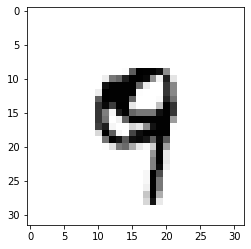

In [12]:
# 预测
image_index = 4444
print(x_test[image_index].shape)
plt.imshow(x_test[image_index].reshape(32, 32), cmap='Greys')

pred = model.predict(x_test[image_index].reshape(1, 32, 32, 1))
print(pred.argmax())  # argmax是numpy的函数，表示返回最大数的索引